Sofia Mossayebeh, Jazmin Faiwusiewiez, Dana Rabinovich y Facundo Braslavsky 4TB.

## **1) El origen del conjunto de datos que eligieron para la clasificación binaria**

In [6]:
import pandas as pd
titanic_df = pd.read_csv('/content/titanic_detailed.csv')

## **2) Justificación del problema de clasificación**

In [2]:
#el problema de calsificación binaria es predecir si un pasajero del Titanic sobrevivió o no

## **3) Descripción del dataset y su adecuada exploración de los datos**

In [7]:
# información general
print(titanic_df.info())

# resumen estadistico
print(titanic_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           601 non-null    int64  
 1   Survived              601 non-null    int64  
 2   Pclass                601 non-null    int64  
 3   Name                  601 non-null    object 
 4   Sex                   601 non-null    object 
 5   Age                   601 non-null    float64
 6   SibSp                 601 non-null    int64  
 7   Parch                 601 non-null    int64  
 8   Fare                  601 non-null    float64
 9   Cabin                 274 non-null    object 
 10  Embarked              601 non-null    object 
 11  FamilySize            601 non-null    int64  
 12  AgeGroup_Infant       601 non-null    bool   
 13  AgeGroup_Child        601 non-null    bool   
 14  AgeGroup_Teenager     601 non-null    bool   
 15  AgeGroup_Young Adult  6

In [9]:
# exploración de los atributos numéricos continuos
numerico_df = titanic_df.select_dtypes(include=['number'])

# matriz de correlación
cm = numerico_df.corr()

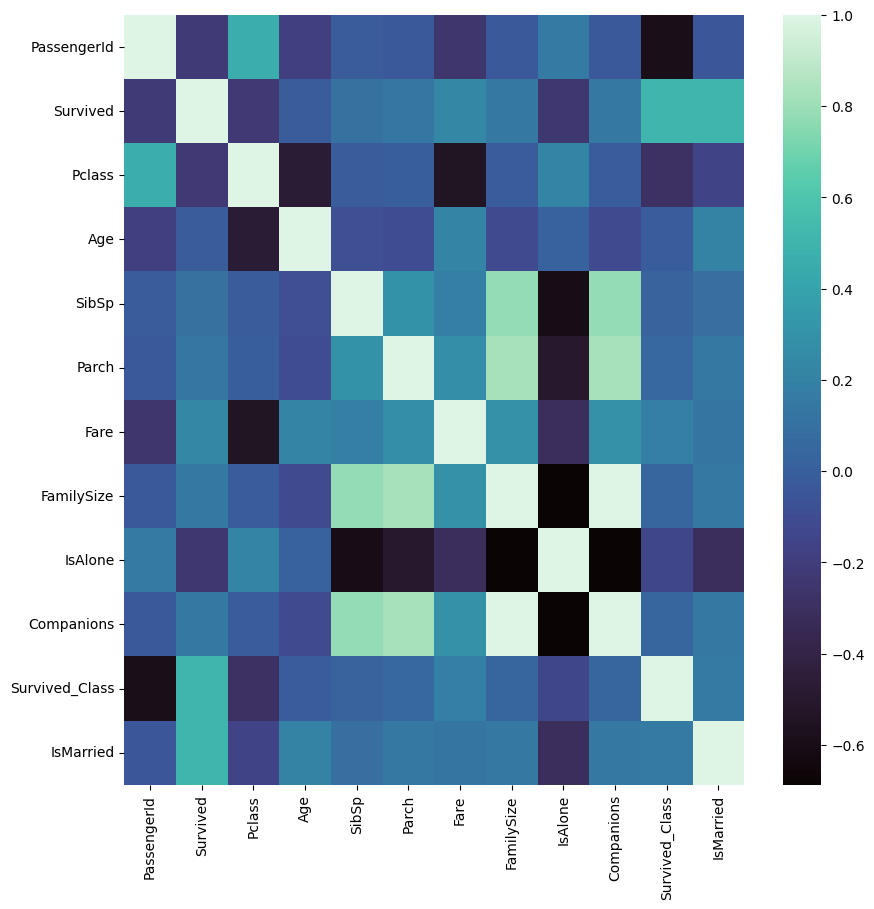

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# ver correlación con un heatmap
fig, ax = plt.subplots  (figsize=(10, 10))
sns.heatmap(cm, ax=ax, cmap="mako")
plt.show()

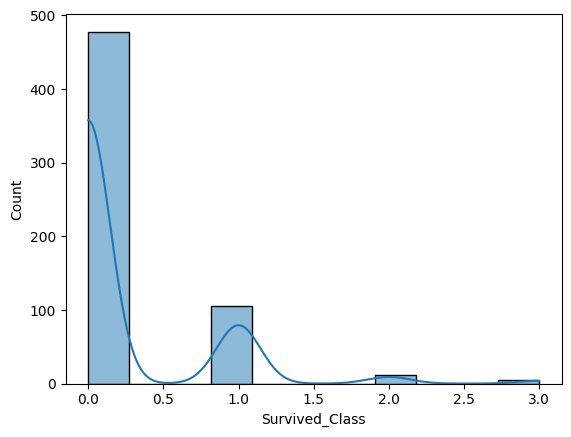

In [13]:
# ver distribución de atributos seleccionados con histplot
sns.histplot(titanic_df["Survived_Class"], kde=True)
plt.show()

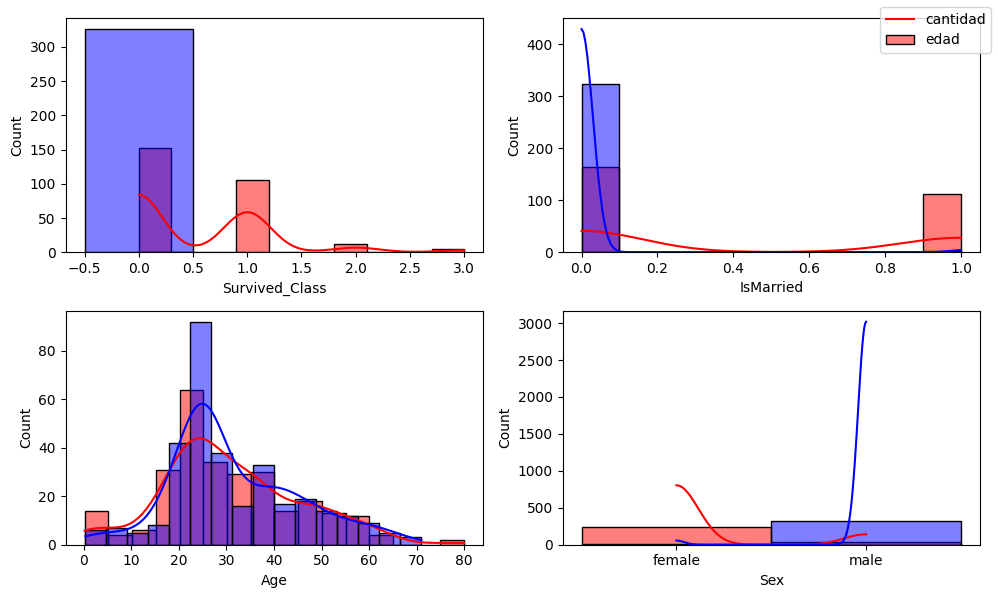

In [14]:
#serie de histogramas que diferencian caracteristicas entre los pasajeros sobrevivientes y los que no
ds_true = titanic_df[titanic_df["Survived"] == 1]
ds_false = titanic_df[titanic_df["Survived"] == 0]

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(ds_true["Survived_Class"], kde=True, color="red", ax=axs[0, 0])
sns.histplot(ds_false["Survived_Class"], kde=True, color="blue", ax=axs[0, 0])

sns.histplot(ds_true["IsMarried"], kde=True, color="red", ax=axs[0, 1])
sns.histplot(ds_false["IsMarried"], kde=True, color="blue", ax=axs[0, 1])

sns.histplot(ds_true["Age"], kde=True, color="red", ax=axs[1, 0])
sns.histplot(ds_false["Age"], kde=True, color="blue", ax=axs[1, 0])

sns.histplot(ds_true["Sex"], kde=True, color="red", ax=axs[1, 1])
sns.histplot(ds_false["Sex"], kde=True, color="blue", ax=axs[1, 1])

fig.legend(labels=["cantidad", "edad"])

fig.tight_layout()

## **4) Utilizando Scikit Learn, construir los siguientes modelos:**

### **a) A partir de solo los atributos numericos continuos**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, roc_auc_score

In [17]:
# solo atributos numericos
X = titanic_df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']]
Y = titanic_df['Survived']

# aca se divide el dataset en prueba y entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# modelo de Regresión Logística
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)

# predicción
y_pred_logreg = logreg_model.predict(X_test)

# las metricas que debe mostrar
# Precisión averigua cuántos de los que fueron predichos como positivos lo son realmente
print("Precisión (Reg. Logística - Continuos): "), precision_score(Y_test, y_pred_logreg)

# roc_auc_score para verificar que sepa distinguir entre clase 0 (no sobreviviente) y clase 1 (sobreviviente)
print("ROC AUC (Reg. Logística - Continuos): "), roc_auc_score(Y_test, logreg_model.predict_proba(X_test)[:, 1])

Precisión (Reg. Logística - Continuos): 
ROC AUC (Reg. Logística - Continuos): 


(None, 0.7638432017543859)

In [40]:
from sklearn.tree import DecisionTreeClassifier

# modelo de árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

# predicciones
y_pred_tree = tree_model.predict(X_test)

print("Precisión (Reg. Logística - Continuos): ", precision_score(Y_test, y_pred_tree))
print("ROC AUC (Reg. Logística - Continuos): ", roc_auc_score(Y_test, tree_model.predict_proba(X_test)[:, 1]))

Precisión (Reg. Logística - Continuos):  0.6041666666666666
ROC AUC (Reg. Logística - Continuos):  0.6059484649122807


### **b) A partir de tanto los atributos numericos continuos como los atributos categoricos del dataset**

In [23]:
# le preguntamos a ChatGPT "como hago para que los atributos numéricos incluyan los categóricos, ia"
# nos dió algunas opciones y usamos "Label Encoding"

# agregamos algunos atributos categóricos
x = titanic_df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex', 'IsMarried']]
y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# convierte en 0 a 'male' y en 1 a 'female'
x['Sex'] = label_encoder.fit_transform(x['Sex'])

# convierte en 0 a 'Yes' y en 1 a 'No'
x['IsMarried'] = label_encoder.fit_transform(x['IsMarried'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<ipython-input-25-bc7a4e613e4b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = label_encoder.fit_transform(x['Sex'])
<ipython-input-25-bc7a4e613e4b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['IsMarried'] = label_encoder.fit_transform(x['IsMarried'])


In [42]:
from sklearn.linear_model import LogisticRegression

# modelo de Regresón Logística
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred_logreg = log_model.predict(x_test)

print("Precisión (Reg. Logística - Continuos): ", precision_score(Y_test, y_pred_tree))
print("ROC AUC (Reg. Logística - Continuos): ", roc_auc_score(y_test, log_model.predict_proba(x_test)[:, 1]))

Precisión (Reg. Logística - Continuos):  0.6041666666666666
ROC AUC (Reg. Logística - Continuos):  0.9462719298245612


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.tree import DecisionTreeClassifier

# modelo Árbol de Decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)

print("Precisión (Reg. Logística - Continuos): ", precision_score(y_test, y_pred_logreg))
print("ROC AUC (Reg. Logística - Continuos): ", roc_auc_score(y_test, log_model.predict_proba(x_test)[:, 1]))

Precisión (Reg. Logística - Continuos):  0.9772727272727273
ROC AUC (Reg. Logística - Continuos):  0.9462719298245612


### **c) Para este último modelo de Arbol de Decisión se debe hacer una exploración de sus posibles hiperparametros para hayar la mejor performance en Validación**

In [45]:
from sklearn.model_selection import GridSearchCV

# definición de los hiperparamentos averiguaremos
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# usamos GridSearch para elegir el mejor hiperparamento posible
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

#predicción y mejor modelo
best_tree_model = grid_search.best_estimator_
y_pred_tree = best_tree_model.predict(x_test)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Precisión (Reg. Logística - Continuos): ", precision_score(y_test, y_pred_tree))
print("ROC AUC (Reg. Logística - Continuos): ", roc_auc_score(y_test, tree_model.predict_proba(x_test)[:, 1]))

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Precisión (Reg. Logística - Continuos):  0.9772727272727273
ROC AUC (Reg. Logística - Continuos):  0.8556743421052632


## **5) Para todos los modelos se debe evaluar:**

### **a) La performance haciendo uso de las metricas Precision y ROC AUC ambas ya implementadas en SK-Learn.**

In [34]:
# ya lo hicimos en todos los modelos

### **b) Mostrar una Matriz de Confusión sobre los datos de Test**

Accuracy: <function accuracy_score at 0x7a4d2ff40430>


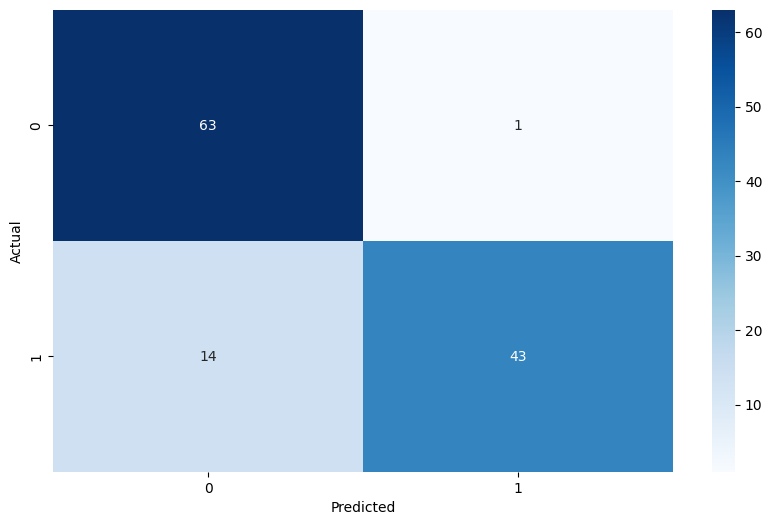

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy_score)

# en Regresión Logística
cm = confusion_matrix(y_test, y_pred_logreg)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

Accuracy: <function accuracy_score at 0x7a4d2ff40430>


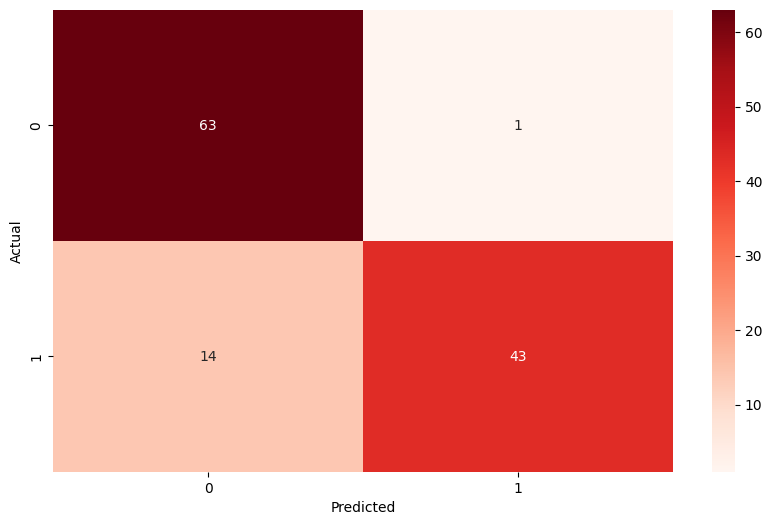

In [57]:
accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_score)

# en Árbol de Decisión
cm = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Reds', ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

### **c) Interpretar la Importancia de Atributos, en el caso de Arboles investiguen como se puede obtener la "Feature Importance"**

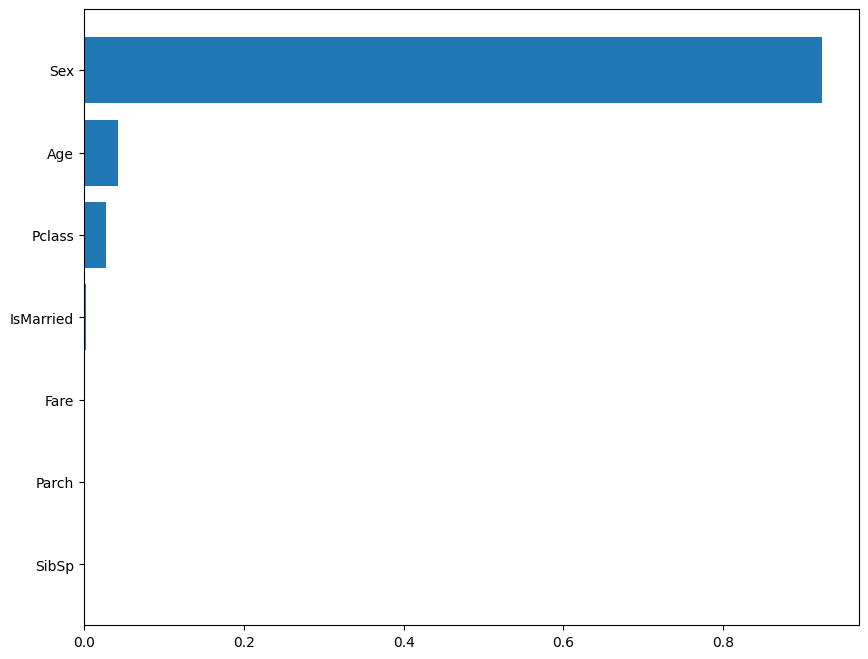

In [63]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

feature_importances = pd.DataFrame(
    {"column": x.columns, "importance": best_tree_model.feature_importances_}
).sort_values(by="importance", ascending=True)

ax.barh(feature_importances["column"], feature_importances["importance"])
feature_importance  = best_tree_model.feature_importances_
features = x.columns

#importancia de cada atributo
#for feature, importance in zip(features, feature_importance):
#    print(f"{feature}: {importance}")